<a href="https://colab.research.google.com/github/NityayKherde/Rcnn_Major_project/blob/main/Trashcan_YOLOV8_Material.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation and Setup

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 22.6 MB/s eta 0:00:00


In [2]:
import requests
import zipfile
import os
import glob
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
# Step 1: Install Pytorch (CUDA-enabled for GPU usage, if available)
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117





Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117


In [3]:
# Step 2: Clone the Detectron2 GitHub repository
!git clone https://github.com/facebookresearch/detectron2.git



Cloning into 'detectron2'...
remote: Enumerating objects: 15806, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 15806 (delta 22), reused 38 (delta 9), pack-reused 15743 (from 1)
Receiving objects: 100% (15806/15806), 6.38 MiB | 10.30 MiB/s, done.
Resolving deltas: 100% (11516/11516), done.


In [4]:
# Install required libraries
!pip install torch torchvision torchaudio
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.10/index.html
!pip install opencv-python matplotlib requests

import requests
import zipfile
import os
import glob
import random
import numpy as np
import cv2
import json
import torch
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from detectron2.data.datasets import register_coco_instances
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.10/index.html


In [4]:
# Step 3: Install the Detectron2 package
%cd detectron2
!pip install -e .

/content/detectron2
Obtaining file:///content/detectron2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 53.3 MB/s eta 0:00:00
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61396 sha256=f377154ac511a1e29df93f299ae25b2175c107fb1dabd9ef5b7c7eb7db1b8823
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_run

## Download the Dataset


In [17]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
print("Detectron2 imported successfully!")

Detectron2 imported successfully!


In [18]:
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)

In [19]:
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

In [20]:
# download_file(
#     'https://www.dropbox.com/scl/fi/hx5aea0q0ljcdh38n748m/underwatertrash.v1i.coco.zip?dl=1',
#     'trash_inst_material1.zip'
# )

unzip(zip_file='/content/drive/MyDrive/trash_inst_material.zip')

Extracted all


In [ ]:
!wget https://www.dropbox.com/scl/fi/hx5aea0q0ljcdh38n748m/underwatertrash.v1i.coco.zip?dl=1

--2024-11-17 15:35:19--  https://www.dropbox.com/scl/fi/hx5aea0q0ljcdh38n748m/underwatertrash.v1i.coco.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘underwatertrash.v1i.coco.zip?dl=1’

underwatertrash.v1i     [  <=>               ] 164.50K   365KB/s    in 0.5s    

2024-11-17 15:35:20 (365 KB/s) - ‘underwatertrash.v1i.coco.zip?dl=1’ saved [168450]



In [47]:
# Register dataset in Detectron2
from detectron2.data.datasets import register_coco_instances
# register_coco_instances("trash_train", {}, "./trash_inst_material/train/_annotations.coco.json", "./trash_inst_material1/train")
# register_coco_instances("trash_val", {}, "./trash_inst_material/val/_annotations.coco.json", "./trash_inst_material1/val")
# register_coco_instances("trash_test", {}, "./trash_inst_material/test/_annotations.coco.json", "./trash_inst_material1/test")

# Configurations for Faster RCNN
cfg = get_cfg()
cfg.merge_from_file("detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("trash_train",)
cfg.DATASETS.TEST = ("trash_valid",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl"  # Pretrained weights
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.STEPS = (15000, 18000)  # Decay learning rate at these steps
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 20000 # Adjust based on dataset size
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 18  # Number of classes based on label list
cfg.OUTPUT_DIR = "./output"

# Train the model
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

# # Inference and evaluation on test set
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for this model
# cfg.DATASETS.TEST = ("trash_test", )
# predictor = DefaultPredictor(cfg)

# # Load the test dataset and evaluate
# test_metadata = MetadataCatalog.get("trash_test")
# dataset_dicts = DatasetCatalog.get("trash_test")

# # Prediction and Visualization
# def visualize_predictions(predictor, dataset_dicts, num_samples=4):
#     for d in random.sample(dataset_dicts, num_samples):
#         img = cv2.imread(d["file_name"])
#         outputs = predictor(img)
#         v = Visualizer(img[:, :, ::-1], metadata=test_metadata, scale=0.5)
#         v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#         cv2.imshow("Prediction", v.get_image()[:, :, ::-1])
#         cv2.waitKey(0)

# visualize_predictions(predictor, dataset_dicts)



[11/17 18:14:44 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[11/17 18:14:45 d2.engine.train_loop]: Starting training from iteration 0
[11/17 18:14:52 d2.utils.events]:  eta: 1:47:03  iter: 19  total_loss: 3.832  loss_cls: 3.085  loss_box_reg: 0.4339  loss_rpn_cls: 0.05367  loss_rpn_loc: 0.0103    time: 0.3172  last_time: 0.3415  data_time: 0.0228  last_data_time: 0.0123   lr: 4.9953e-06  max_mem: 2707M
[11/17 18:14:58 d2.utils.events]:  eta: 1:44:29  iter: 39  total_loss: 3.51  loss_cls: 2.95  loss_box_reg: 0.4342  loss_rpn_cls: 0.01916  loss_rpn_loc: 0.008413    time: 0.3109  last_time: 0.3358  data_time: 0.0124  last_data_time: 0.0136   lr: 9.9902e-06  max_mem: 2707M
[11/17 18:15:04 d2.utils.events]:  eta: 1:42:24  iter: 59  total_loss: 3.181  loss_cls: 2.555  loss_box_reg: 0.4611  loss_rpn_cls: 0.03335  loss_rpn_loc: 0.006992    time: 0.3093  last_time: 0.2766  data_time: 0.0099  last_data_time: 0.0124   lr: 1.4985e-05  max_mem: 2707M
[11/17 18:15:10 d2.utils.events]:  eta: 1:42:13  iter: 79  total_loss: 2.882  loss_cls: 2.118  loss_box_reg:

In [50]:
import os
import torch
import pickle

# Path to save the trained model
final_model_pth_path = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
final_model_pkl_path = os.path.join(cfg.OUTPUT_DIR, "model_final.pkl")

# Save the model as a .pth file
torch.save(trainer.model.state_dict(), final_model_pth_path)
print(f"Model successfully saved as .pth to {final_model_pth_path}")

# Save the model as a .pkl file
with open(final_model_pkl_path, "wb") as f:
    pickle.dump(trainer.model.state_dict(), f)
print(f"Model successfully saved as .pkl to {final_model_pkl_path}")


Model successfully saved as .pth to ./output/model_final.pth
Model successfully saved as .pkl to ./output/model_final.pkl


[11/17 20:01:52 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

WARNING [11/17 20:01:53 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/17 20:01:53 d2.data.datasets.coco]: Loaded 1082 images in COCO format from ./trash_inst_material1/test/_annotations.coco.json


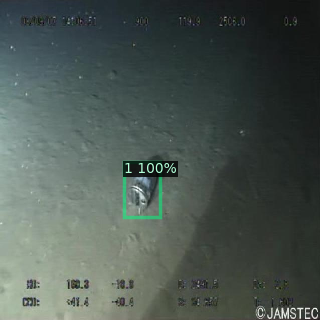

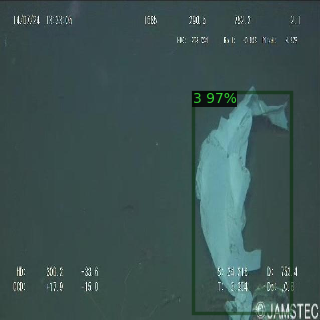

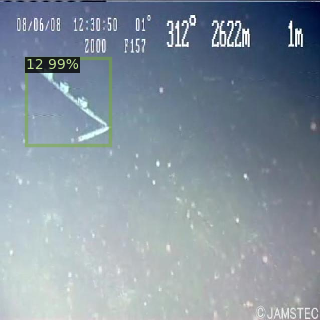

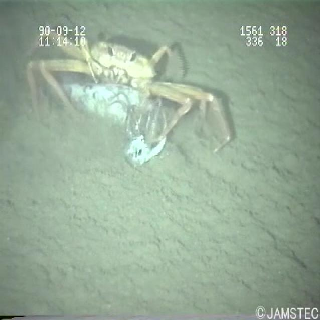

Starting evaluation...
WARNING [11/17 20:01:53 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [11/17 20:01:54 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/17 20:01:54 d2.data.datasets.coco]: Loaded 1082 images in COCO format from ./trash_inst_material1/test/_annotations.coco.json
[11/17 20:01:54 d2.data.build]: Distribution of instances among all 18 categories:
|   category    | #instances   | category   | #instances   |  category  | #instances   |
|:-------------:|:-------------|:-----------|:-------------|:----------:|:-------------|
| plants-anim.. | 438          | 0          | 13           |     1      | 138          |
|       2       | 25           | 3          | 246          |     4      | 5            |
|       5       | 51           | 6          | 104          |     7      | 31           |
|       8  

In [48]:
from google.colab.patches import cv2_imshow
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
import numpy as np

# Configure the model for testing
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Adjust threshold based on dataset and task
cfg.DATASETS.TEST = ("trash_test", )
predictor = DefaultPredictor(cfg)

# Load metadata and dataset
test_metadata = MetadataCatalog.get("trash_test")
dataset_dicts = DatasetCatalog.get("trash_test")

# Visualization Function
def visualize_predictions(predictor, dataset_dicts, num_samples=4):
    """Visualizes predictions on random samples from the test dataset."""
    import random
    from detectron2.utils.visualizer import Visualizer

    for d in random.sample(dataset_dicts, num_samples):
        img = cv2.imread(d["file_name"])
        outputs = predictor(img)
        v = Visualizer(img[:, :, ::-1], metadata=test_metadata, scale=0.5)
        v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

        # Display image in Colab
        cv2_imshow(v.get_image()[:, :, ::-1])

# Visualize predictions
visualize_predictions(predictor, dataset_dicts)

# Efficient Evaluation Using COCOEvaluator
print("Starting evaluation...")

# Initialize the COCO-style evaluator
evaluator = COCOEvaluator("trash_test", cfg, False, output_dir="./output/")
test_loader = build_detection_test_loader(cfg, "trash_test")

# Run inference and evaluate
evaluation_results = inference_on_dataset(predictor.model, test_loader, evaluator)

# Extract precision, recall, and mAP (mean Average Precision) from results
precision = evaluation_results["bbox"]["AP50"]  # Precision at IoU 0.5
recall = evaluation_results["bbox"]["AP75"]  # Recall at IoU 0.75
mean_ap = evaluation_results["bbox"]["AP"]  # Mean Average Precision

# Summarize and display results
print("\nEvaluation Results:")
print(f"Precision (AP50): {precision:.2f}")
print(f"Recall (AP75): {recall:.2f}")
print(f"Mean Average Precision (mAP): {mean_ap:.2f}")




In [49]:
# Advanced Metrics (Optional)
def calculate_additional_metrics(dataset_dicts, predictor):
    """Calculates accuracy, precision, recall, and F1 score."""
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    y_true = []
    y_pred = []

    for d in dataset_dicts:
        img = cv2.imread(d["file_name"])
        outputs = predictor(img)
        gt_classes = [ann['category_id'] for ann in d["annotations"]]
        pred_classes = outputs["instances"].pred_classes.cpu().numpy() if len(outputs["instances"]) > 0 else []

        if pred_classes:  # Only include if there are predictions
            y_true.extend(gt_classes[:len(pred_classes)])  # Match lengths
            y_pred.extend(pred_classes)

    if y_true and y_pred:
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

        print("\nAdvanced Metrics:")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")
    else:
        print("No predictions made for metrics calculation.")

# Call additional metrics calculation
calculate_additional_metrics(dataset_dicts, predictor)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
def visualize_predictions(predictor, dataset_dicts, num_samples=4):
    for d in random.sample(dataset_dicts, num_samples):
        img = cv2.imread(d["file_name"])
        outputs = predictor(img)
        v = Visualizer(img[:, :, ::-1], metadata=test_metadata, scale=0.5)
        v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        cv2.imshow("Prediction", v.get_image()[:, :, ::-1])
        cv2.waitKey(0)

visualize_predictions(predictor, dataset_dicts)

In [ ]:
import os

for root, dirs, files in os.walk("./"):
    for file in files:
        print(os.path.join(root, file))


Streaming output truncated to the last 5000 lines.
./trash_inst_material/train/vid_000139_frame0000022_jpg.rf.957105c747bef23813e5b87650bf565f.jpg
./trash_inst_material/train/vid_000260_frame0000079_jpg.rf.8c4878a17623b4f9b43c631766314e51.jpg
./trash_inst_material/train/vid_000365_frame0000033_jpg.rf.c99334d704f8daa376b14f6cc05b3998.jpg
./trash_inst_material/train/vid_000289_frame0000032_jpg.rf.39fb0683d8fab3a3f92f08b367f1940a.jpg
./trash_inst_material/train/vid_000438_frame0000053_jpg.rf.947126f3d5642d2653861ef6978dc6c4.jpg
./trash_inst_material/train/vid_000312_frame0000009_jpg.rf.27f19276b4253ffd5421eef223671480.jpg
./trash_inst_material/train/vid_000150_frame0000047_jpg.rf.83f7c94045cbfe2943ee73af1239ae62.jpg
./trash_inst_material/train/vid_000242_frame0000010_jpg.rf.0f5a58b82985624c870362259dd72741.jpg
./trash_inst_material/train/vid_000251_frame0000017_jpg.rf.ced0d0a4c38c365dec8a302491775568.jpg
./trash_inst_material/train/vid_000550_frame0000021_jpg.rf.2dec367d0ffcfc0e36e28eaa86

In [31]:
from detectron2.data import DatasetCatalog

if "trash_train" not in DatasetCatalog.list():
    register_coco_instances("trash_train", {}, "./trash_inst_material1/train/_annotations.coco.json", "./trash_inst_material1/train")


In [32]:
from detectron2.data import MetadataCatalog

MetadataCatalog.remove("trash_train")
DatasetCatalog.remove("trash_train")

# Re-register with the desired path
register_coco_instances("trash_train", {}, "./trash_inst_material1/train/_annotations.coco.json", "./trash_inst_material1/train")


In [33]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog

# Avoid re-registering the dataset
if "trash_train" not in DatasetCatalog.list():
    register_coco_instances("trash_test", {}, "./trash_inst_material1/train/_annotations.coco.json", "./trash_inst_material1/train")


In [34]:
from detectron2.data import DatasetCatalog

if "trash_test" not in DatasetCatalog.list():
    register_coco_instances("trash_test", {}, "./trash_inst_material1/test/_annotations.coco.json", "./trash_inst_material1/test")


In [35]:
from detectron2.data import MetadataCatalog

MetadataCatalog.remove("trash_test")
DatasetCatalog.remove("trash_test")

# Re-register with the desired path
register_coco_instances("trash_test", {}, "./trash_inst_material1/test/_annotations.coco.json", "./trash_inst_material1/test")


In [36]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog

# Avoid re-registering the dataset
if "trash_test" not in DatasetCatalog.list():
    register_coco_instances("trash_test", {}, "./trash_inst_material/test1/_annotations.coco.json", "./trash_inst_material1/test")


In [37]:
from detectron2.data import DatasetCatalog

if "trash_valid" not in DatasetCatalog.list():
    register_coco_instances("trash_valid", {}, "./trash_inst_material1/valid/_annotations.coco.json", "./trash_inst_material1/valid")


In [38]:
from detectron2.data import MetadataCatalog

MetadataCatalog.remove("trash_valid")
DatasetCatalog.remove("trash_valid")

# Re-register with the desired path
register_coco_instances("trash_valid", {}, "./trash_inst_material1/valid/_annotations.coco.json", "./trash_inst_material1/valid")


In [39]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog

# Avoid re-registering the dataset

if "trash_valid" not in DatasetCatalog.list():
    register_coco_instances("trash_valid", {}, "./trash_inst_material1/valid/_annotations.coco.json", "./trash_inst_material1/valid")


In [40]:
import json

def update_category_ids(annotation_file):
    with open(annotation_file, 'r') as f:
        data = json.load(f)

    for ann in data['annotations']:
        ann['category_id'] -= 1  # Shift all category IDs down by 1

    with open(annotation_file, 'w') as f:
        json.dump(data, f)

update_category_ids('./trash_inst_material1/train/_annotations.coco.json')
update_category_ids('./trash_inst_material1/test/_annotations.coco.json')
update_category_ids('./trash_inst_material1/valid/_annotations.coco.json')



In [ ]:
%env CUDA_LAUNCH_BLOCKING=1


env: CUDA_LAUNCH_BLOCKING=1


In [45]:
import json

with open("./trash_inst_material1/train/_annotations.coco.json", 'r') as f:
    data = json.load(f)

num_classes = len(data['categories'])
print("Number of classes:", num_classes)

cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes


Number of classes: 18


In [ ]:
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 18


In [42]:
def update_category_ids(annotation_file):
    with open(annotation_file, 'r') as f:
        data = json.load(f)

    for ann in data['annotations']:
        if ann['category_id'] > 0:  # Only decrement valid category IDs
            ann['category_id'] -= 1

    # Update the category IDs in the "categories" section to match the new range
    for i, cat in enumerate(data['categories']):
        cat['id'] = i  # Assign new sequential IDs starting from 0


    with open(annotation_file, 'w') as f:
        json.dump(data, f)

# Apply the fix
update_category_ids('./trash_inst_material1/train/_annotations.coco.json')
update_category_ids('./trash_inst_material1/valid/_annotations.coco.json')
update_category_ids('./trash_inst_material1/test/_annotations.coco.json')


In [43]:
import json

def validate_coco_annotations(annotation_file):
    with open(annotation_file, 'r') as f:
        data = json.load(f)

    category_ids = [cat['id'] for cat in data['categories']]
    for ann in data['annotations']:
        if ann['category_id'] not in category_ids:
            print(f"Invalid category_id {ann['category_id']} in {annotation_file}")
        if ann['category_id'] < 0:
            print(f"Negative category_id found in {annotation_file}")

validate_coco_annotations('./trash_inst_material1/train/_annotations.coco.json')
validate_coco_annotations('./trash_inst_material1/test/_annotations.coco.json')
validate_coco_annotations('./trash_inst_material1/valid/_annotations.coco.json')


In [ ]:
cfg.MODEL.DEVICE = "cpu"


In [ ]:
CUDA_LAUNCH_BLOCKING=1 python your_script.py


SyntaxError: invalid syntax (<ipython-input-37-2206fad8f8a2>, line 1)

In [ ]:
import yaml

attr = {
    'path': cwd+'/trash_inst_material',
    'train': 'train/images',
    'val': 'val/images',

    'names': {
        0: 'rov',
        1: 'plant',
        2: 'animal_fish',
        3: 'animal_starfish',
        4: 'animal_shells',
        5: 'animal_crab',
        6: 'animal_eel',
        7: 'animal_etc',
        8: 'trash_etc',
        9: 'trash_fabric',
        10: 'trash_fishing_gear',
        11: 'trash_metal',
        12: 'trash_paper',
        13: 'trash_plastic',
        14: 'trash_rubber',
        15: 'trash_wood',
    }
}

In [ ]:
with open('trashcan_inst_material.yaml', 'w') as f:
    yaml.dump(attr, f)

### YOLOv8 Nano Segmentation Model Training

In [ ]:
EPOCHS = 30
!yolo \
task=segment \
mode=train \
model=yolov8n-seg.pt \
imgsz=640 \
data=trashcan_inst_material.yaml \
epochs={EPOCHS} \
batch=16 \
name=yolov8n-seg \
exist_ok=True \
amp=False

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.74M/6.74M [00:00<00:00, 128MB/s]
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=trashcan_inst_material.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n-seg, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=Fal

### YOLOv8s Training

In [ ]:
EPOCHS = 30
!yolo \
task=detect \
mode=train \
model=yolov8s-seg.pt \
imgsz=640 \
data=trashcan_inst_material.yaml \
epochs={EPOCHS} \
batch=16 \
name=yolov8s-seg \
exist_ok=True \
amp=False

100% 22.8M/22.8M [00:00<00:00, 114MB/s] 
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=trashcan_inst_material.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s-seg, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False,

### YOLOv8m Training

In [ ]:
EPOCHS = 30
!yolo \
task=detect \
mode=train \
model=yolov8m-seg.pt \
imgsz=640 \
data=trashcan_inst_material.yaml \
epochs={EPOCHS} \
batch=16 \
name=yolov8m-seg \
exist_ok=True \
amp=False

100% 52.4M/52.4M [00:00<00:00, 126MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=trashcan_inst_material.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8m-seg, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, 

We get the best results using the YOLOv8m model. We have a box mAP of almost 50 and mask mAP of 37.8 which is pretty good.

## Image Inference

As we have the trained models now, let's use the best model for running inference on some images.

In [ ]:
# Download the inference data.
download_file(
    'https://www.dropbox.com/s/smdsotzz5al3bi2/trash_segment_inference_data.zip?dl=1',
    'trash_segment_inference_data.zip'
)

unzip(zip_file='trash_segment_inference_data.zip')

Extracted all


Before that, following is a simple image visualization function.

In [ ]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir):
    """
    Function accepts a list of images and plots
    them in either a 1x1 grid or 2x2 grid.
    """
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    if len(image_names) < 4:
        plt.figure(figsize=(10, 7))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(1, 1, i+1)
            plt.imshow(image)
            plt.axis('off')
            break
    if len(image_names) >= 4:
        plt.figure(figsize=(15, 12))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(2, 2, i+1)
            plt.imshow(image)
            plt.axis('off')
            if i == 3:
                break
    plt.tight_layout()
    plt.show()

In [ ]:
!yolo predict \
model='runs/segment/yolov8m-seg/weights/best.pt' \
source='trash_inst_material/val/images/' \
name='yolov8m_predict' \
exist_ok=True \
save=True

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 263 layers, 24,594,720 parameters, 0 gradients, 98.7 GFLOPs

image 1/1204 /content/trash_inst_material/val/images/vid_000002_frame0000013.jpg: 384x640 2 trash_etcs, 83.7ms
image 2/1204 /content/trash_inst_material/val/images/vid_000002_frame0000014.jpg: 384x640 1 trash_etc, 1 trash_plastic, 29.1ms
image 3/1204 /content/trash_inst_material/val/images/vid_000002_frame0000015.jpg: 384x640 1 trash_etc, 1 trash_metal, 1 trash_plastic, 29.0ms
image 4/1204 /content/trash_inst_material/val/images/vid_000002_frame0000016.jpg: 384x640 1 trash_etc, 1 trash_plastic, 29.0ms
image 5/1204 /content/trash_inst_material/val/images/vid_000002_frame0000017.jpg: 384x640 1 trash_etc, 1 trash_metal, 1 trash_plastic, 29.0ms
image 6/1204 /content/trash_inst_material/val/images/vid_000002_frame0000018.jpg: 384x640 1 trash_etc, 1 trash_plastic, 22.5ms
image 7/1204 /content/trash_inst_material/val/images/

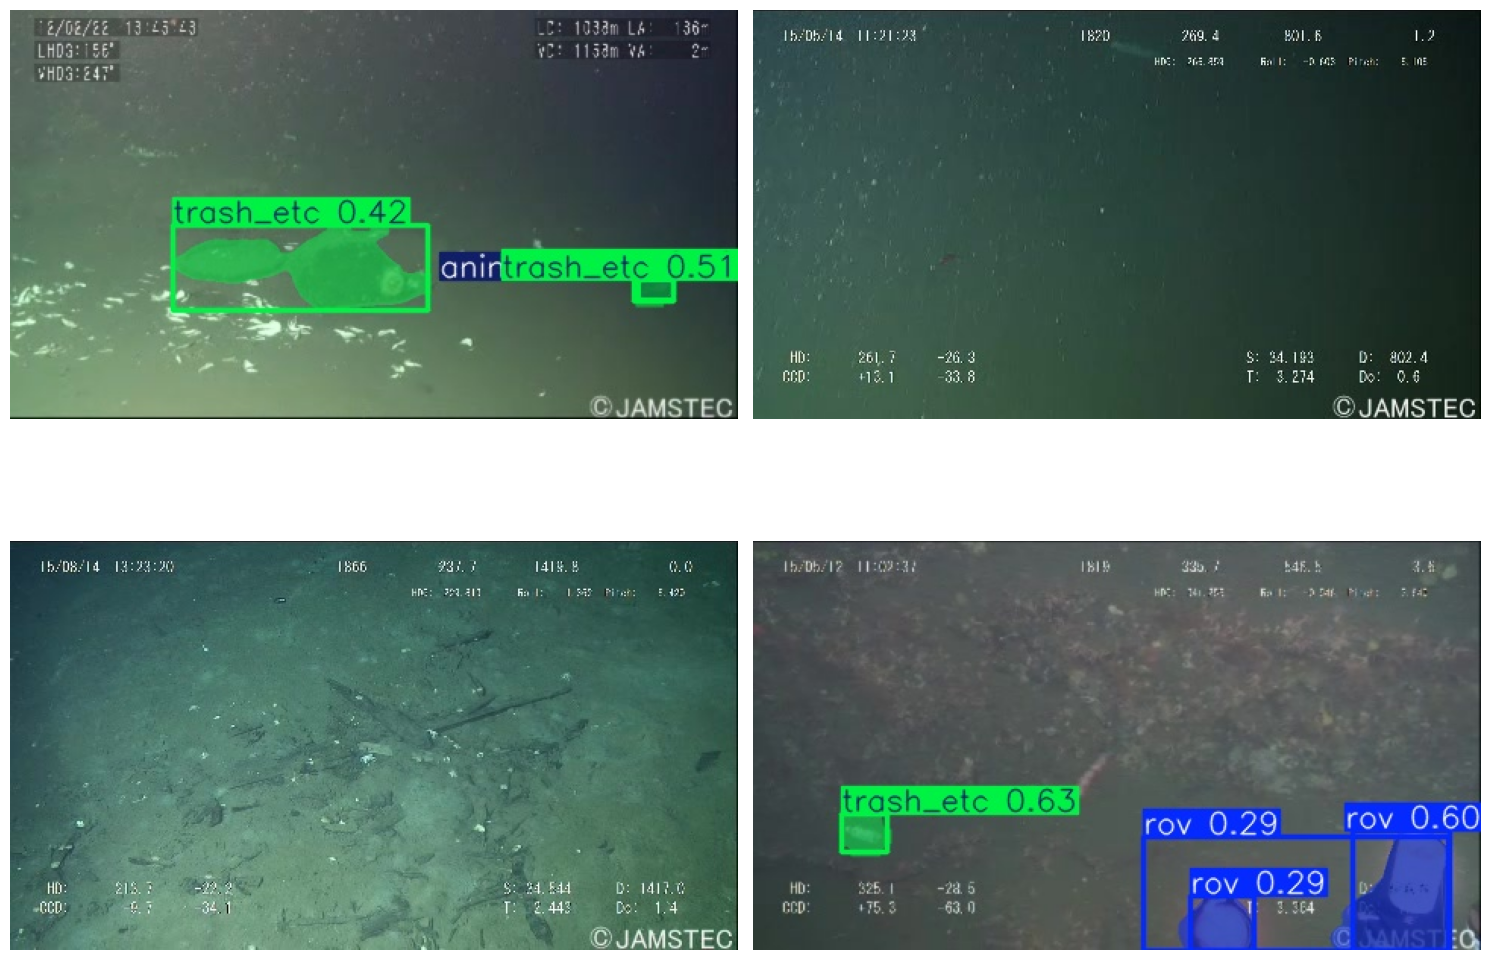

In [ ]:
visualize('runs/segment/yolov8m_predict')

## Inference on Videos

For one final testing, let's run inference on videos.

In [ ]:
!yolo predict \
model='runs/segment/yolov8m-seg/weights/best.pt' \
source='trash_segment_inference_data/manythings.mp4' \
name='yolov8m_predict_videos1' \
exist_ok=True \
save=True

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 263 layers, 24,594,720 parameters, 0 gradients, 98.7 GFLOPs

video 1/1 (frame 1/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 1 trash_plastic, 79.7ms
video 1/1 (frame 2/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 1 trash_etc, 2 trash_metals, 1 trash_plastic, 32.9ms
video 1/1 (frame 3/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 3 trash_etcs, 1 trash_plastic, 32.8ms
video 1/1 (frame 4/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 1 trash_etc, 32.8ms
video 1/1 (frame 5/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 1 trash_etc, 32.8ms
video 1/1 (frame 6/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 1 trash_etc, 1 trash_metal, 1 trash_plastic, 28.2ms
video 1/1 (frame 7/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 2 trash_etcs,

In [ ]:
!yolo predict \
model='runs/segment/yolov8m-seg/weights/best.pt' \
source='trash_segment_inference_data/videoplayback.mp4' \
name='yolov8m_predict_videos1' \
exist_ok=True \
save=True

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 263 layers, 24,594,720 parameters, 0 gradients, 98.7 GFLOPs

video 1/1 (frame 1/1002) /content/trash_segment_inference_data/videoplayback.mp4: 384x640 (no detections), 82.5ms
video 1/1 (frame 2/1002) /content/trash_segment_inference_data/videoplayback.mp4: 384x640 (no detections), 29.0ms
video 1/1 (frame 3/1002) /content/trash_segment_inference_data/videoplayback.mp4: 384x640 (no detections), 29.0ms
video 1/1 (frame 4/1002) /content/trash_segment_inference_data/videoplayback.mp4: 384x640 (no detections), 27.8ms
video 1/1 (frame 5/1002) /content/trash_segment_inference_data/videoplayback.mp4: 384x640 (no detections), 27.8ms
video 1/1 (frame 6/1002) /content/trash_segment_inference_data/videoplayback.mp4: 384x640 (no detections), 27.8ms
video 1/1 (frame 7/1002) /content/trash_segment_inference_data/videoplayback.mp4: 384x640 1 trash_metal, 1 trash_plastic, 27.8ms
video 1/1 (frame

In [ ]:
!yolo predict \
model='runs/segment/yolov8m-seg/weights/best.pt' \
source='trash_segment_inference_data/video.mp4' \
name='yolov8m_predict_videos1' \
exist_ok=True \
save=True

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 263 layers, 24,594,720 parameters, 0 gradients, 98.7 GFLOPs

video 1/1 (frame 1/4425) /content/trash_segment_inference_data/video.mp4: 384x640 (no detections), 87.0ms
video 1/1 (frame 2/4425) /content/trash_segment_inference_data/video.mp4: 384x640 (no detections), 29.1ms
video 1/1 (frame 3/4425) /content/trash_segment_inference_data/video.mp4: 384x640 (no detections), 29.0ms
video 1/1 (frame 4/4425) /content/trash_segment_inference_data/video.mp4: 384x640 (no detections), 29.1ms
video 1/1 (frame 5/4425) /content/trash_segment_inference_data/video.mp4: 384x640 (no detections), 29.0ms
video 1/1 (frame 6/4425) /content/trash_segment_inference_data/video.mp4: 384x640 (no detections), 29.4ms
video 1/1 (frame 7/4425) /content/trash_segment_inference_data/video.mp4: 384x640 (no detections), 29.0ms
video 1/1 (frame 8/4425) /content/trash_segment_inference_data/video.mp4: 384x640 (no d

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import os
import requests
from zipfile import ZipFile
from detectron2.config import CfgNode
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultTrainer

def download_file(url, save_name):
  """Downloads a file from the specified URL and saves it with the given name.

  Args:
      url: The URL of the file to download.
      save_name: The name to save the downloaded file as.
  """
  if not os.path.exists(save_name):
    print(f"Downloading {url}...")
    file = requests.get(url)
    open(save_name, 'wb').write(file.content)
    print(f"Downloaded and saved as {save_name}")

def unzip(zip_file):
  """Unzips a zip file.

  Args:
      zip_file: The path to the zip file to unzip.
  """
  try:
    with ZipFile(zip_file) as z:
      z.extractall("./")
      print("Extracted all content from", zip_file)
  except Exception as e:
    print(f"Error unzipping {zip_file}: {e}")

# Download the dataset if it doesn't exist
download_file(
    'https://www.dropbox.com/s/ievh0sesad015z0/trash_inst_material.zip?dl=1',
    'trash_inst_material.zip'
)

# Unzip the downloaded dataset
unzip(zip_file='trash_inst_material.zip')


# Download pre-trained Mask R-CNN model weights (modify URL if needed)
download_file(
    'https://dl.fbaipublicfiles.com/maskrcnn-benchmark/mask_rcnn_R_50_FPN_3x.yaml',
    'mask_rcnn_R_50_FPN_3x.yaml'
)

# Define configuration (modify hyperparameters as needed)
cfg = CfgNode.load_yaml_from_file('mask_rcnn_R_50_FPN_3x.yaml')
cfg.DATASETS.TRAIN = ("trashcan_dataset",)
cfg.DATASETS.TEST = ("trashcan_dataset",)
cfg.OUTPUT_DIR = "output"
cfg.SOLVER.MAX_ITER = 30  # Adjust training epochs
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 16  # Modify for your number of trash classes

# Prepare your dataset (modify for your data structure)
# 1. Define a custom dataset class inheriting from detectron2.data.Dataset
# 2. Implement functions like _len, __getitem_ to return image and annotations
# 3. Register your dataset in detectron2.data.DatasetCatalog

# Train the model
trainer = DefaultTrainer(cfg)
trainer.resume_or_detect(resume=False)

# Inference on validation images
predictor = MaskRCNNPredictor(cfg)
metadata = MetadataCatalog.get("trashcan_dataset")
img_dir = "trash_inst_material/val/images"

for filename in os.listdir(img_dir):
  if filename.endswith(".jpg") or filename.endswith(".png"):
    img_path = os.path.join(img_dir, filename)
    with open(img_path, 'rb') as f:
      im = cv2.imread(f.name)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].pred_boxes, outputs["instances"].pred_masks)
    plt.imshow(v.get_image())
    plt.show()

# # Inference on videos (modify video paths)
# video_paths = ["trash_segment_inference_data/manythings.mp4", "trash_segment_inference_data/videoplayback.mp4", "trash_segment_inference_data/video.mp4"]
# for video_path in video_paths:
#   # Implement video processing using OpenCV or moviepy
#   # Read video frames, perform inference on each frame, and visualize predictions

# # Mount Google Drive if needed
# from google.colab import drive
# drive.mount('/content/drive')

Extracted all content from trash_inst_material.zip


AttributeError: type object 'CfgNode' has no attribute 'load_yaml_from_file'

Even the Extra Large model, is running at more than 28 FPS on the Tesla T4 GPU which is more than real-time. This is really impressive.

In [ ]:
# Import necessary libraries
import os
import requests
from zipfile import ZipFile
import cv2
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultTrainer
from detectron2.engine.defaults import DefaultPredictor
import matplotlib.pyplot as plt

def download_file(url, save_name):
    """Downloads a file from the specified URL and saves it with the given name."""
    if not os.path.exists(save_name):
        print(f"Downloading {url}...")
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)
        print(f"Downloaded and saved as {save_name}")

def unzip(zip_file):
    """Unzips a zip file."""
    try:
        with ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all content from", zip_file)
    except Exception as e:
        print(f"Error unzipping {zip_file}: {e}")

# Download the dataset if it doesn't exist
download_file(
    'https://www.dropbox.com/s/ievh0sesad015z0/trash_inst_material.zip?dl=1',
    'trash_inst_material.zip'
)

# Unzip the downloaded dataset
unzip(zip_file='trash_inst_material.zip')

# Define configuration
cfg = get_cfg()
cfg.merge_from_file("detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Updated path for default config
cfg.DATASETS.TRAIN = ("trashcan_dataset",)
cfg.DATASETS.TEST = ("trashcan_dataset",)
cfg.OUTPUT_DIR = "output"
cfg.SOLVER.MAX_ITER = 30  # Adjust training epochs
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 16  # Modify for your number of trash classes

# Prepare your dataset (modify for your data structure)
# 1. Define a custom dataset class inheriting from detectron2.data.Dataset
# 2. Implement functions like __len__, __getitem__ to return image and annotations
# 3. Register your dataset in detectron2.data.DatasetCatalog

# Train the model
trainer = DefaultTrainer(cfg)
trainer.resume_or_detect(resume=False)

# Inference on validation images
predictor = DefaultPredictor(cfg)
metadata = MetadataCatalog.get("trashcan_dataset")
img_dir = "trash_inst_material/val/images"

for filename in os.listdir(img_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(img_dir, filename)
        im = cv2.imread(img_path)
        outputs = predictor(im)
        v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=0.8)
        v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        plt.imshow(v.get_image())
        plt.axis('off')
        plt.show()


Extracted all content from trash_inst_material.zip
[11/13 17:19:07 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_f

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_train_images'

In [ ]:
import os
import requests
from zipfile import ZipFile
import cv2
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultTrainer
from detectron2.engine.defaults import DefaultPredictor
from detectron2.structures import BoxMode
import matplotlib.pyplot as plt

def download_file(url, save_name):
    """Downloads a file from the specified URL and saves it with the given name."""
    if not os.path.exists(save_name):
        print(f"Downloading {url}...")
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)
        print(f"Downloaded and saved as {save_name}")

def unzip(zip_file):
    """Unzips a zip file."""
    try:
        with ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all content from", zip_file)
    except Exception as e:
        print(f"Error unzipping {zip_file}: {e}")

def get_trashcan_dicts(image_dir, ann_dir):
    """Function to load dataset and annotations."""
    dataset_dicts = []

    for idx, file_name in enumerate(os.listdir(image_dir)):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            record = {}
            image_path = os.path.join(image_dir, file_name)
            record["file_name"] = image_path
            record["image_id"] = idx
            record["height"] = 800  # Set to actual image height (you can extract using cv2)
            record["width"] = 800   # Set to actual image width (you can extract using cv2)

            # Load annotations (bounding boxes) for each image
            ann_file = os.path.join(ann_dir, file_name.replace(".jpg", ".json"))

            annotations = []
            if os.path.exists(ann_file):
                # Assume your annotations are in COCO-like JSON format
                # Example format: {"annotations": [{"bbox": [x, y, width, height], "category_id": 0}, ...]}
                import json
                with open(ann_file) as f:
                    data = json.load(f)
                    for obj in data['annotations']:
                        bbox = obj['bbox']  # [x, y, width, height]
                        category_id = obj['category_id']
                        annotation = {
                            "bbox": bbox,
                            "bbox_mode": BoxMode.XYWH_ABS,  # You can choose other box modes
                            "category_id": category_id
                        }
                        annotations.append(annotation)

            record["annotations"] = annotations
            dataset_dicts.append(record)

    return dataset_dicts

# Download the dataset if it doesn't exist
download_file(
    'https://www.dropbox.com/s/ievh0sesad015z0/trash_inst_material.zip?dl=1',
    'trash_inst_material.zip'
)

# Unzip the downloaded dataset
unzip(zip_file='trash_inst_material.zip')

# Register dataset in DatasetCatalog
train_image_dir = "trash_inst_material/train/images"
train_ann_dir = "trash_inst_material/train/annotations"

# Check if dataset is already registered, and if so, unregister and re-register it
dataset_name = "trashcan_dataset"
if dataset_name in DatasetCatalog:
    print(f"Dataset '{dataset_name}' is already registered. Unregistering and re-registering.")
    del DatasetCatalog._REGISTERED[dataset_name]  # Unregister the existing dataset

DatasetCatalog.register(dataset_name, lambda: get_trashcan_dicts(train_image_dir, train_ann_dir))
MetadataCatalog.get(dataset_name).set(thing_classes=["class1", "class2", "class3", "class4", "class5",
                                                    "class6", "class7", "class8", "class9", "class10",
                                                    "class11", "class12", "class13", "class14", "class15",
                                                    "class16"])

# Define configuration
cfg = get_cfg()
cfg.merge_from_file("detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Updated path for default config
cfg.DATASETS.TRAIN = (dataset_name,)
cfg.DATASETS.TEST = (dataset_name,)
cfg.OUTPUT_DIR = "output"
cfg.SOLVER.MAX_ITER = 30  # Adjust training epochs
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 16  # Modify for your number of trash classes

# Train the model
trainer = DefaultTrainer(cfg)
trainer.resume_or_detect(resume=False)

# Inference on validation images
predictor = DefaultPredictor(cfg)
metadata = MetadataCatalog.get(dataset_name)
val_img_dir = "trash_inst_material/val/images"

for filename in os.listdir(val_img_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(val_img_dir, filename)
        im = cv2.imread(img_path)
        outputs = predictor(im)
        v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=0.8)
        v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        plt.imshow(v.get_image())
        plt.axis('off')
        plt.show()


Extracted all content from trash_inst_material.zip
Dataset 'trashcan_dataset' is already registered. Unregistering and re-registering.


AttributeError: '_DatasetCatalog' object has no attribute '_REGISTERED'

In [ ]:
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 16  # 16 classes in your case
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Adjust the score threshold if necessary
cfg.SOLVER.MAX_ITER = 500  # Increase iterations for better training
